## **Случайные события. Практическая работа**

### Итоги модуля
В этом модуле было введено понятие **пространства элементарных событий**. Это пространство состоит из различных **исходов** случайной величины. Вероятности элементарных событий в этом пространстве будут принимать значения от 0 до 1.

В пространстве событий помимо **элементарных** исходов есть также **сложные** события, являющиеся объединением нескольких элементарных.

Вы также познакомились с **зависимыми** событиями и понятием **условной вероятности**. На основе этого определения строится **формула Байеса**. Она связывает теоретические вероятности осуществления события (**априорная** вероятность) с вероятностями, основанными на некотором опыте (условная или **апостериорная** вероятность). Эта формула позволяет как бы «поменять местами» причину и следствие — получить взаимосвязь между P(A|B) и P(B|A).

Эта практическая работа поможет закрепить полученные знания. В одной части заданий нужно вычислить вероятности сложных событий. Другая часть заданий посвящена применению теоремы Байеса, а также включает в себя краткое знакомство с **наивным байесовским классификатором (НБК)** — одной из моделей машинного обучения.

Основную информацию, необходимую для решения данной практической работы, можно найти в теоретическом разделе этого модуля. Критерии оценки заданий основаны на полноте и правильности решений, а также правильности/неправильности финальных ответов.

### Цели практической работы
- закрепить полученные знания о вычислении вероятностей сложных событий;
- ближе познакомиться с условными вероятностями, теоремой Байеса и байесовским классификатором.

### Что оценивается
Умение вычислять вероятности сложных событий и вероятности с использованием теоремы Байеса, понимание условных вероятностей. В каждой задаче требуется соотнести набор известных значений вероятностей с условными вероятностями и вычислить новые вероятности. Задача считается решённой, если выполнены все её условия, а также даны правильные ответы на вопросы.

### Как отправить задание на проверку
Выполните задания, сохраните изменения при помощи опции Save and Checkpoint на вкладке меню File или кнопки Save and Checkpoint на панели инструментов. Отправьте итоговый файл Jupyter Notebook (в формате .ipynb) или ссылку на него через форму.


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
ls -l

total 8
drwx------ 5 root root 4096 Aug 18 16:59 drive/
drwxr-xr-x 1 root root 4096 Aug 16 13:42 sample_data/


In [3]:
import os
os.chdir('drive/MyDrive/SkillBox/Prob')

In [12]:
ls -l

total 2231
-rw------- 1 root root  137180 Aug 14 11:53  1.3_SkillBox_Тест_Определение_Вероятности.ipynb
-rw------- 1 root root 1051676 Aug 17 15:30 '1.5_SkillBox_Вероятность_Практическая работа.ipynb'
-rw------- 1 root root 1064809 Aug 18 11:14  2.4_SkillBox_Вероятность_сложных_событий.ipynb
-rw------- 1 root root   25266 Aug 18 13:02 '2.6 Практическая работа.ipynb'
drwx------ 2 root root    4096 Aug 18 12:43  data/


### **Задание 1**

Даны таблицы с суммами и произведениями значений при броске двух кубиков. Используя эти таблицы, вычислите вероятности следующих сложных событий.

<p align="left">
  <img src="https://drive.google.com/uc?id=1If1NDfwPCfLC6JHqxa5IDgXLRzrbB-sI" alt="drawing" width="600"/>
</p>

<p align="left">
  <img src="https://drive.google.com/uc?id=1vWNTqND6br6XzESVSwqKjK9AqeN0-k-4" alt="drawing" width="600"/>
</p>

1. Вероятность, что полученная сумма значений на кубиках — нечётное число.


In [4]:
import itertools
import pandas as pd
import numpy as np
import random

df_sum = pd.DataFrame([[i+j for i in np.arange(1,7)] for j in np.arange(1,7)], index=range(1,7), columns = range(1,7))
df_sum

,1,2,3,4,5,6
1,2,3,4,5,6,7
2,3,4,5,6,7,8
3,4,5,6,7,8,9
4,5,6,7,8,9,10
5,6,7,8,9,10,11
6,7,8,9,10,11,12


In [5]:
df_prod = pd.DataFrame([[i*j for i in np.arange(1,7)] for j in np.arange(1,7)], index=range(1,7), columns = range(1,7))
df_prod

,1,2,3,4,5,6
1,1,2,3,4,5,6
2,2,4,6,8,10,12
3,3,6,9,12,15,18
4,4,8,12,16,20,24
5,5,10,15,20,25,30
6,6,12,18,24,30,36


2. Вероятность, что полученная сумма значений на кубиках — число, кратное трём.



In [6]:
df_sum[df_sum % 3 == 0]

,1,2,3,4,5,6
1,NaN,3.0,NaN,NaN,6.0,NaN
2,3.0,NaN,NaN,6.0,NaN,NaN
3,NaN,NaN,6.0,NaN,NaN,9.0
4,NaN,6.0,NaN,NaN,9.0,NaN
5,6.0,NaN,NaN,9.0,NaN,NaN
6,NaN,NaN,9.0,NaN,NaN,12.0


In [7]:
# Количество ненулевых значений - значений суммы, кратных 3
numb_nonna = sum(df_sum[df_sum % 3 == 0].count(axis=1))
print('Количество значений, кратных 3: ', numb_nonna)
# Всего значений в таблице 6^2 = 36
print('Вероятность, что полученная сумма значений на 2-х кубиках — число, кратное трём равна', numb_nonna/36)

Количество значений, кратных 3:  12
Вероятность, что полученная сумма значений на 2-х кубиках — число, кратное трём равна 0.3333333333333333


3. Вероятность, что сумма будет меньше пяти или больше десяти.


In [8]:
df_sum[(df_sum < 5) | (df_sum > 10) ]

,1,2,3,4,5,6
1,2.0,3.0,4.0,NaN,NaN,NaN
2,3.0,4.0,NaN,NaN,NaN,NaN
3,4.0,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,11.0
6,NaN,NaN,NaN,NaN,11.0,12.0


In [9]:
# Количество ненулевых значений - значений суммы, меньше пяти или больше десяти
numb_nonna = sum(df_sum[(df_sum < 5) | (df_sum > 10) ].count(axis=1))
print('Количество значений суммы, меньше пяти или больше десяти: ', numb_nonna)
# Всего значений в таблице 6^2 = 36
print('Вероятность, что полученная сумма значений суммы, меньше пяти или больше десяти равна', numb_nonna/36)

Количество значений суммы, меньше пяти или больше десяти:  9
Вероятность, что полученная сумма значений суммы, меньше пяти или больше десяти равна 0.25


4. Вероятность, что произведение значений будет равно двенадцати.


In [10]:
df_prod[df_prod == 12]

,1,2,3,4,5,6
1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,12.0
3,NaN,NaN,NaN,12.0,NaN,NaN
4,NaN,NaN,12.0,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,12.0,NaN,NaN,NaN,NaN


In [11]:
# Количество значений произведения, равных двенадцати
numb_nonna = sum(df_prod[df_prod == 12].count(axis=1))
print('Количество значений суммы, меньше пяти или больше десяти: ', numb_nonna)
# Всего значений в таблице 6^2 = 36
print('Вероятность значения произведения, равного двенадцати', numb_nonna/36)

Количество значений суммы, меньше пяти или больше десяти:  4
Вероятность значения произведения, равного двенадцати 0.1111111111111111


5. Вероятность, что произведение значений — нечётно.


In [12]:
df_prod[df_prod % 2 != 0]

,1,2,3,4,5,6
1,1.0,NaN,3.0,NaN,5.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN
3,3.0,NaN,9.0,NaN,15.0,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN
5,5.0,NaN,15.0,NaN,25.0,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# Количество нечетных значений произведения
numb_nonna = sum(df_prod[df_prod % 2 != 0].count(axis=1))
print('Количество нечетных значений произведения: ', numb_nonna)
# Всего значений в таблице 6^2 = 36
print('Вероятность нечетных значений произведения', numb_nonna/36)

Количество нечетных значений произведения:  9
Вероятность нечетных значений произведения 0.25


6. Вероятность, что сумма значений окажется больше или равной их произведению.

In [14]:
df_sum[df_sum >= df_prod]

,1,2,3,4,5,6
1,2,3.0,4.0,5.0,6.0,7.0
2,3,4.0,NaN,NaN,NaN,NaN
3,4,NaN,NaN,NaN,NaN,NaN
4,5,NaN,NaN,NaN,NaN,NaN
5,6,NaN,NaN,NaN,NaN,NaN
6,7,NaN,NaN,NaN,NaN,NaN


In [15]:
# Количество значений суммы превышающих значение произведения
numb_nonna = sum(df_sum[df_sum >= df_prod].count(axis=1))
print('Количество значений суммы превышающих значение произведения: ', numb_nonna)
# Всего значений в таблице 6^2 = 36
print('Вероятность значений суммы превышающих значение произведения', numb_nonna/36)

Количество значений суммы превышающих значение произведения:  12
Вероятность значений суммы превышающих значение произведения 0.3333333333333333


### **Задание 2**
Загрузите данные о пассажирах «Титаника» из файла titanic.csv в приложенных к практической работе файлах. Ограничьтесь набором таких переменных, как класс билета пассажира, пол и переменной, показывающей, выжил он или нет. В этом датасете все эти переменные заполнены непустым значением.


In [16]:
import pandas as pd
titanic = pd.read_csv("data/train.csv")
df = titanic[['PassengerId','Survived','Pclass','Sex']]
df

,PassengerId,Survived,Pclass,Sex
0,1,0,3,male
1,2,1,1,female
2,3,1,3,female
3,4,1,1,female
4,5,0,3,male
...,...,...,...,...
886,887,0,2,male
887,888,1,1,female
888,889,0,3,female
889,890,1,1,male


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   PassengerId  891 non-null    int64 
 1   Survived     891 non-null    int64 
 2   Pclass       891 non-null    int64 
 3   Sex          891 non-null    object
dtypes: int64(3), object(1)
memory usage: 28.0+ KB


In [18]:
df.shape[0]

891

In [19]:
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

1. Запишите в P_fem вероятность, что случайный пассажир «Титаника» — женщина.


In [20]:
P_fem = df['Sex'].value_counts()[1]/df.shape[0]
P_fem

0.35241301907968575

2. Запишите в P_1class вероятность, что случайный пассажир «Титаника» ехал в первом классе.


In [21]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [22]:
P_1class = df['Pclass'].value_counts()[1]/df.shape[0]
P_1class

0.24242424242424243

3. Запишите в P_surv вероятность, что случайный пассажир «Титаника» выжил.


In [23]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [24]:
P_surv = df['Survived'].value_counts()[1]/df.shape[0]
P_surv

0.3838383838383838

4. Запишите в P_fem_surv вероятность, что пассажир — женщина, и одновременно с этим пассажир выжила в катастрофе.


In [25]:
df[(df['Survived'] == 1) & (df['Sex'] == 'female')]

,PassengerId,Survived,Pclass,Sex
1,2,1,1,female
2,3,1,3,female
3,4,1,1,female
8,9,1,3,female
9,10,1,2,female
...,...,...,...,...
874,875,1,2,female
875,876,1,3,female
879,880,1,1,female
880,881,1,2,female


In [26]:
# доля выживших женщин среди всех пассажиров
P_fem_surv = df[(df['Survived'] == 1) & (df['Sex'] == 'female')].shape[0] / df.shape[0]
P_fem_surv

0.2615039281705948

5. Найдите условную вероятность того, что пассажир выживет, при условии, если пассажир — женщина.


In [27]:
P_cond_surv_fem = df[(df['Survived'] == 1) & (df['Sex'] == 'female')].shape[0] / df[(df['Sex'] == 'female')].shape[0]
P_cond_surv_fem

0.7420382165605095

6. По аналогии найдите вероятность того, что пассажир выживет, если пассажир ехал в первом классе.


In [28]:
P_cond_surv_1class = df[(df['Survived'] == 1) & (df['Pclass'] == 1)].shape[0] / df[(df['Pclass'] == 1)].shape[0]
P_cond_surv_1class

0.6296296296296297

7. Найдите вероятность того, что пассажир выживет при условии, что пассажир ехал в первом классе и является женщиной.


In [29]:
P_cond_surv_1class_fem = df[(df['Survived'] == 1) & (df['Pclass'] == 1) & (df['Sex'] == 'female')].shape[0]  /  df[ (df['Pclass'] == 1) & (df['Sex'] == 'female')].shape[0]
P_cond_surv_1class_fem

0.9680851063829787

8. Найдите вероятность того, что пассажир выживет при условии, что пассажир ехал во втором классе и является мужчиной.


In [30]:
P_cond_surv_2class_male = df[(df['Survived'] == 1) & (df['Pclass'] == 2)& (df['Sex'] == 'male')].shape[0] / df[ (df['Pclass'] == 2) & (df['Sex'] == 'male')].shape[0]
P_cond_surv_2class_male

0.1574074074074074

9. Используя посчитанные вероятности, найдите вероятность того, что случайно выбранный пассажир — женщина, если мы знаем, что пассажир выжил.


In [31]:
P_cond_fem_surv = P_fem_surv*P_fem/P_surv
P_cond_fem_surv

0.24009424984083852

10. Используя посчитанные вероятности, найдите вероятность того, что случайно выбранный пассажир ехал в первом классе, если мы знаем, что пассажир выжил.


In [32]:
P_cond_1class_surv = P_cond_surv_1class*P_surv/P_1class
P_cond_1class_surv

0.9969135802469135

11. Сравните полученные вероятности с безусловными вероятностями соответствующих событий. Объясните разницу в значениях.

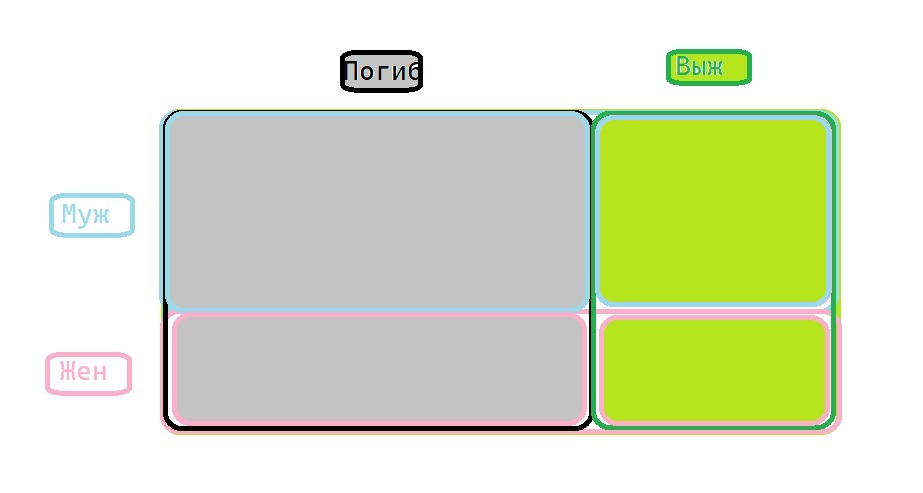

<img src = 'https://drive.google.com/file/d/1TD4boKknHvMBqBs8qM26AxbxtpOAHxek/view?usp=drive_link' alt="Рис.1 Разбиение множества пассажиров на подмножества мужчин и женщин и подмножества выживших и погибших">


Вероятность, что пассажир — женщина, и одновременно с этим пассажир выжил в катастрофе:
$$P(Множество-женщин ∩ Множество-выживших-пассажиров) = \frac{Количество-выживших-женщин}{Количество-пассажиров}$$

Условная Вероятность того, что случайно выбранный пассажир — женщина, если мы знаем, что пассажир выжил:
$$ P(Пассажир-Женщина|Пассажир-выжил) = \frac {P(Множество-женщин ∩ Множество-выживших-пассажиров)}{P(Пассажир-выжил)} = \frac{\frac{Количество-выживших-женщин}{Количество-пассажиров}}{\frac{Количество-выцживших-пассажиров}{Количество-пассажиров}} = \frac{Количество-выживших-женщин}{Количество-выживших-пассажиров}$$


Условная Вероятность того, что случайно выбранный пассажир — выжил, если мы знаем, что пассажир женщина:
$$ P(Пассажир-выжил|Пассажир-Женщина) = \frac {P(Множество-женщин ∩ Множество-выживших-пассажиров)}{P(Пассажир-Женщина)} = \frac{\frac{Количество-выживших-женщин}{Количество-пассажиров}}{\frac{Количество-Женщин}{Количество-пассажиров}} = \frac{Количество-выживших-женщин}{Количество-Женщин}$$

Мы видим, что  эти две условные вероятности связаны между собой. Однако сам по себе множитель количество_женщин/количество_выживших_пассажиров не имеет смысла, но если и числитель и знаменатель разделить на общее число пассажиров, то приходим к отношению абсолютных вероятностей:

$$P(Пассажир−Женщина|Пассажир−выжил) = P(Пассажир-выжил|Пассажир-Женщина) \cdot \frac {Количество-Женщин}{Количество-выживших-пассажиров} = \frac {\frac{Количество-Женщин}{Количество-пассажиров}}{\frac {Количество-выживших-пассажиров}{Количество-пассажиров}} = P(Пассажир-выжил|Пассажир-Женщина) \cdot \frac{P(Пассажир-Женщина)}{P(Пассажир-выжил)}$$  

Т.е. отношение двух не связанных между собой абсолютных вероятностей равно отношению двух 'сопряженных' или 'взаимнообратных' условных вероятностей:
$$ \frac{ P(Пассажир−Женщина|Пассажир−выжил)}{P(Пассажир-выжил|Пассажир-Женщина)}
=\frac{P(Пассажир-Женщина)}{P(Пассажир-выжил)}$$


In [33]:
# количество выживших пассажиров
N_surv = df[(df['Survived'] == 1)].shape[0]
print('количество выживших пассажиров: ', N_surv )

# количество выживших женщин
N_surv_fem = df[(df['Survived'] == 1) & (df['Sex'] == 'female')].shape[0]
print('количество выживших женщин: ', N_surv_fem)

# Условная вероятность обнаружить женщину среди выживших пассажиров = доле выживших женщин среди выживших пассажиров
# Условная Вероятность того, что случайно выбранный пассажир — женщина, если мы знаем, что пассажир выжил - это тоже самое
P_cond_surv_fem = N_surv_fem/N_surv

# условная вероятность того, что пассажир выживет, при условии, если пассажир — женщина.
P_cond_surv_fem = df[(df['Survived'] == 1) & (df['Sex'] == 'female')].shape[0] / df[(df['Sex'] == 'female')].shape[0]

# условная вероятность того, что пассажир - женщина, при условии, если пассажир выжил.
P_cond_fem_surv = df[(df['Survived'] == 1) & (df['Sex'] == 'female')].shape[0] / df[(df['Survived'] == 1)].shape[0]

# отношения равны
print(f'{100*P_cond_fem_surv:.2f}%/{100*P_cond_surv_fem:.2f}% - {100*P_fem:.2f}%/{100*P_surv:.2f}% =',P_cond_fem_surv/P_cond_surv_fem - P_fem/P_surv)

количество выживших пассажиров:  342
количество выживших женщин:  233
68.13%/74.20% - 35.24%/38.38% = 0.0


.

### **Задание 3**
Рассмотрим датасет со статистикой почтового ящика `letters.xlsx`. Данные можно найти в материалах к практической работе. Там содержится 248 записей с информацией о письмах.

Нам хочется узнать, является ли новое письмо, пришедшее к нам на почту, спамом. Для этого у нас существует статистика писем. Каждое пришедшее письмо может быть либо спамом, либо нет. При этом и спам, и нормальные письма могут содержать слова, характерные для спам-писем. Данный датасет представляет собой набор записей с информацией о пришедших ранее письмах, распознанных человеком как спам или нет.




In [34]:
df1 = pd.read_excel('data/letters.xlsx', sheet_name='Sheet1', index_col='id_letter')
df1

,spam,spam_words
id_letter,,
1,да,нет
2,да,да
3,нет,нет
4,нет,да
5,да,да
...,...,...
244,нет,нет
245,нет,нет
246,нет,нет


Столбец `spam` отвечает на вопрос, является письмо спамом или нет, `spam_words` — содержит ли оно слова, встречающиеся в спам-письмах.

1. Найдите долю спам-писем по отношению ко всем.



In [42]:
P_spam = df1[(df1['spam'] == 'да')].shape[0] / df1.shape[0]
P_spam

0.3548387096774194

2. Найдите долю писем со спам-подобными словами по отношению ко всем.


In [43]:
P_spam_words = df1[(df1['spam_words'] == 'да')].shape[0] / df1.shape[0]
P_spam_words

0.375

3. Найдите вероятность, что письмо содержит спам-подобные слова при условии, что оно является спамом.


In [45]:
P_cond_spam_words_spam = df1[(df1['spam_words'] == 'да') & (df1['spam'] == 'да')].shape[0] / df1[(df1['spam'] == 'да')].shape[0]
P_cond_spam_words_spam

0.36363636363636365

4. Найдите вероятность, что письмо является спамом при условии, что оно содержит спам-подобные слова.


In [50]:
# через теорему Байеса
P_cond_spam_spam_words1 = P_cond_spam_words_spam * P_spam/P_spam_words
P_cond_spam_spam_words1

0.3440860215053763

In [46]:
# через мощности множеств
P_cond_spam_spam_words = df1[(df1['spam_words'] == 'да') & (df1['spam'] == 'да')].shape[0] / df1[(df1['spam_words'] == 'да')].shape[0]
P_cond_spam_spam_words

0.34408602150537637

С помощью такого принципа [работает наивный байесовский классификатор](https://ru.wikipedia.org/wiki/%D0%91%D0%B0%D0%B9%D0%B5%D1%81%D0%BE%D0%B2%D1%81%D0%BA%D0%B0%D1%8F_%D1%84%D0%B8%D0%BB%D1%8C%D1%82%D1%80%D0%B0%D1%86%D0%B8%D1%8F_%D1%81%D0%BF%D0%B0%D0%BC%D0%B0). При обучении модели для каждого встреченного в письмах слова высчитывается и сохраняется вероятность того, что письмо с этим словом — спам. И в дальнейшем, на основе наличия в письме слов с высокой вероятностью встречающихся в спам-письмах, машина может рассчитать условную вероятность того, что в таком случае письмо является спамом. Если эта вероятность превысит 0,5, можно положить такое письмо в спам. Более сложные модели учитывают не только наличие определённых слов, но и множество других факторов. Тем самым, по целому ряду свойств письма можно рассчитать соответствующую условную вероятность, что письмо будет спамом при условии, что оно обладает некоторым набором характеристик. Такой классификатор работает достаточно хорошо и быстро в простых ситуациях, однако он слишком завязан на варианты значений условий. Например, если в тренировочном датасете не встречалась определённая комбинация условных факторов, то классификатор не сможет оценить вероятность в ситуации, если такая комбинация встретится в тестовой выборке.